# Generate spatial varying tau and max level for the potential temperature restoring
This code generates two spatial maps:\
(1) the reciprocal of the restoring timesclae (rtau). It shoule be named as "PT_RESTORE_RTAU". \
(2) the max level for restoring. It should be named as "PT_RESTORE_MAX_LEVEL" and it should be integer.

In [1]:
import netCDF4 as nc
import regionmask
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c_name = 'C_128cores'
c_year = '0291'
with xr.open_mfdataset('/data/rose_scr/yl528729/cesmruns/'+c_name+'/run/'+c_name+'.pop.h.'+c_year+'-01.nc', chunks={'time': 3}, combine='by_coords') as ds:    
    TLONG_da             = ds['TLONG'] # "array of t-grid longitudes" # (nlat, nlon)
    TLAT_da              = ds['TLAT'] # "array of t-grid latitudes" # (nlat, nlon)
    z_t_da               = ds['z_t'] # [cm] # "depth from surface to midpoint of layer"

In [3]:
default_tau    = 3650. # float
default_maxl   = 100 # integer
tau            = np.full(TLONG_da.shape, default_tau) # [days]
maxl           = np.full(TLONG_da.shape, default_maxl)
filename       = 'TAU_GLOB10Y_NA1M_LBD5D'

modify_LBD_tau = True # True if you do want to modify the tau *only* in the Labrador Sea
save_file      = False # True if you do want to save the file. False if you just wanna get the data

tau_LBD        = 5. # [days]

In [4]:
basins          = regionmask.defined_regions.natural_earth.ocean_basins_50
mask            = basins.mask(TLONG_da, TLAT_da)
if modify_LBD_tau:
    mask_LBD           = (mask==19) 
    tau[mask_LBD==True]= tau_LBD
    mask_LBD_val       = mask_LBD.values

In [5]:
if save_file:
    out_filename = '/network/rit/home/yl528729/cesm1_2_1/input_made/'+filename+'.nc'
    print(out_filename)
    out_ds = nc.Dataset(out_filename, 'w', format='NETCDF4')
    out_ds.createDimension('nlat', TLAT_da.shape[0])
    out_ds.createDimension('nlon', TLONG_da.shape[1])

    TLONG     = out_ds.createVariable('TLONG', 'd', ('nlat','nlon'))
    TLAT      = out_ds.createVariable('TLAT', 'd', ('nlat','nlon'))
    rtau_out  = out_ds.createVariable('PT_RESTORE_RTAU', 'd', ('nlat','nlon'))
    maxl_out  = out_ds.createVariable('PT_RESTORE_MAX_LEVEL', 'i', ('nlat','nlon'))
    rtau_out[:] = 1./tau
    maxl_out[:] = maxl
    out_ds.close() 

### A simple plot just to show that $\tau$ inside the Labrador Sea is set to 5 days, and is set to 10 years outside the Labrador Sea.

Text(0.5, 1.0, '$\\frac{1}{\\tau}$ $(day^{-1}$)')

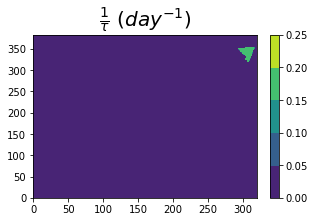

In [6]:
plt.figure(figsize=(5,3))
plt.contourf(1./tau, levels=np.arange(0.,0.3,0.05));plt.colorbar()
plt.title(r'$\frac{1}{\tau}$ $(day^{-1}$)', fontsize=20)